In [1]:
#The function that provides the Bernoulli distribution
from scipy.stats import bernoulli
#The numpy library
import numpy as np
#The graphical tool
import matplotlib.pyplot as plt


In [2]:
# Recap of some important Python concepts

## List
# We can create an empty list like so:
example_list  = []
print(example_list)
# We can add items to the list
example_list.append(1)
print(example_list)
# We can index into the list starting from index 0
print(example_list[0])

## Dictionaries
# A dictionary is an unordered collection of key/value pairs. Let's create an empty dictionary:
example_dict = {}
print(example_dict)
# Let's add a key/value pair to the example
example_dict['a'] = 1
print(example_dict)
# Let's access the value stored at key 'a'
print(example_dict['a'])
# We can list all of the available keys
print(list(example_dict.keys()))

## Lambda Function
# These are short functions we can use to carry out common operations
# Let's write a lambda function to take a number and return its square
square_number = lambda number : number**2
# We can call the lambda function like so
print(square_number(2))

[]
[1]
1
{}
{'a': 1}
1
['a']
4


### Problem 1:
A qubit is in a superposition state with:

1. $a = \frac{1}{\sqrt{2}}$ and $b = \frac{1}{\sqrt{2}}$
2. $a = i \sqrt{\frac{2}{5}}$ and $b = \sqrt{\frac{3}{5}}$
3. $a = \sqrt{\frac{2}{5}}$ and $b = i \sqrt{\frac{3}{5}}$
4. $\theta = \frac{\pi}{4}$ and $\phi = \frac{\pi}{6}$
5. $\theta = \frac{\pi}{4}$ and $\phi = 0$
6. $a = \frac{1}{2}$  and $b =\frac{1}{3}$

Find the result of the measurement of this qubit and interpret it.

In order to find the result, we find $|a|^2$ and $|b|^2$

These are probability amplitudes. To interpret it, we must generate a random Bernoulli process with $p$ and $(1-p)$ and we plot histogram to make sure that they give $|a|^2$ and $|b|^2$.  




In [3]:
#Let's write a lambda function to return a probability from a probability amplitude
probability = lambda amplitude : np.abs(amplitude)**2

In [4]:
#Problem 1 Part 1

## Some questions to consider:
##  Does the relative phase affect the probability outcomes at the end?
##  Is every state properly normalised?

## Define our probability amplitudes
amplitudes = [{'a': 1/np.sqrt(2), 'b': 1/np.sqrt(2)}, {'a': 1j*np.sqrt(2/5), 'b': np.sqrt(3/5)}, {'a': np.sqrt(2/5), 'b': 1j*np.sqrt(3/5)},\
              {'a': np.cos((np.pi/4)/2), 'b': np.exp(1j*np.pi/6)*np.sin((np.pi/4)/2)}, {'a': np.cos((np.pi/4)/2), 'b': np.exp(1j*0)*np.sin((np.pi/4)/2)}, {'a': 1/2, 'b': 1/3}]

## Calculate our probabilities
state_index   = 0
probability_a = probability(amplitudes[state_index]['a'])
probability_b = probability(amplitudes[state_index]['b'])

## Confirm that our state is normalised, that our probabilities sum to 1
probablity_sum = probability_a + probability_b
norm_check     = np.isclose([probablity_sum], [1.0])
print("State normalised?: " + str(norm_check[0]))

State normalised?: True


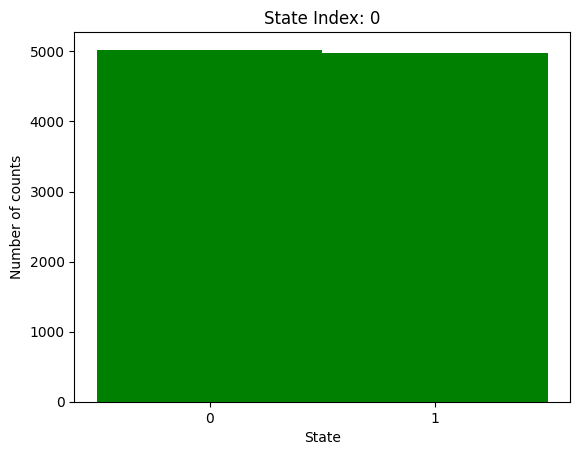

{0: 5024, 1: 4976}
p1 = 49.76 %
p0 = 50.24 %


In [5]:
## Recall that a is the amplitude associated with the state 0 and b is the amplitude associated with state 1
## So the probability to get the state 1 is np.abs(b)**2
## Let's generate a bernoulli distribution using this probability to get the state 1

## The Bernoulli process with 10000 instances and probability to receive "1" equal to probabiliy_b
bernoulli_process = bernoulli.rvs(probability_b, size=10000)

#The histogram that gives states probability:
plt.hist(bernoulli_process, bins=[0,1,2], color="g")
plt.xticks([0.5,1.5],[0,1])
plt.xlabel("State")
plt.ylabel("Number of counts")
plt.title("State Index: " + str(state_index))
plt.show()

## Count the number of unique counts:
unique, counts = np.unique(bernoulli_process, return_counts=True)
## Creating the dictionary:
c = dict(zip(unique, counts))
#Output:
print(c)

#Calculating probability:
print("p1 = %.2f %%"%(100*c[1]/len(bernoulli_process)))
print("p0 = %.2f %%"%(100*c[0]/len(bernoulli_process)))


### Problem 2:
A probabilistic bit is characterised by a probability $p$. How do we observe the bit, what is its distribution and how it is different from a qubit?

In [6]:
#Probability to get "1"
p = 0.3

In [7]:
#The Bernoulli process with 1000 instances and probability to receive "1" equal to p
r = bernoulli.rvs(p, size=10000)

In [8]:
#Printing the process
print(r)

[1 1 0 ... 1 0 0]


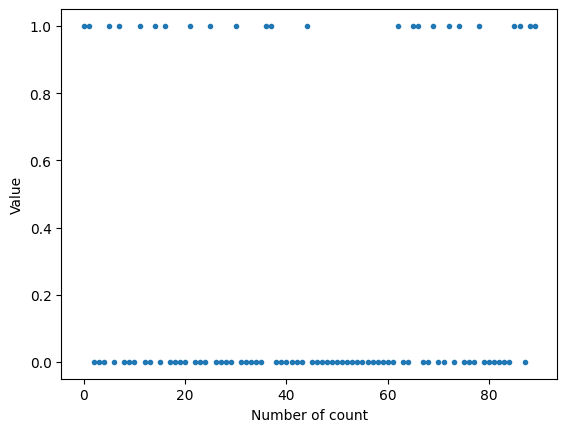

In [9]:
plt.plot(r[:90],'.')
plt.xlabel("Number of count")
plt.ylabel("Value")
plt.show()

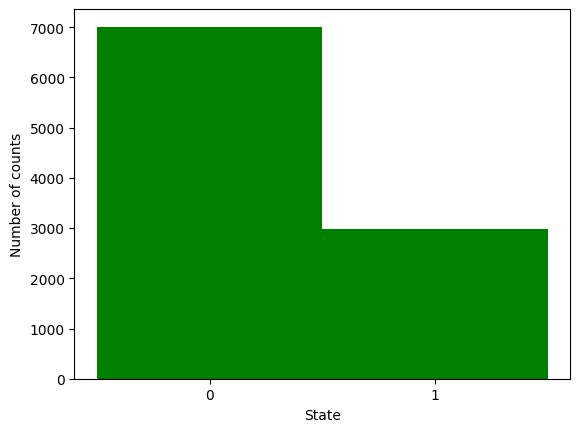

In [10]:
#The histogram that gives states probability:
plt.hist(r, bins=[0,1,2], color="g")
plt.xticks([0.5,1.5],[0,1])
plt.xlabel("State")
plt.ylabel("Number of counts")
plt.show()

In [11]:
#Count the number of unique counts:
unique, counts = np.unique(r, return_counts=True)
#Creating the dictionary:
c = dict(zip(unique, counts))
#Output:
print(c)

{0: 7009, 1: 2991}


In [12]:
#Calculating probability:
print("p1 = %.2f %%"%(100*c[1]/len(r)))
print("p0 = %.2f %%"%(100*c[0]/len(r)))

p1 = 29.91 %
p0 = 70.09 %
